<a href="https://colab.research.google.com/github/DSabarish/NPS-Analysis-with-NumPy/blob/main/NPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import Libraries and Load Data**

In [90]:
# Import necessary libraries
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the provided URL
url = "https://raw.githubusercontent.com/DSabarish/NPS-Analysis-with-NumPy/main/survey.txt"
response = requests.get(url)
data = response.text.strip().split('\n')

# Convert data to integers
data = np.array([int(score) for score in data])

# Display the first few data points to verify
print("First few data points:", data[:10])


First few data points: [ 7 10  5  9  9  4  7  9  9  9]


#**Calculate Promoters, Detractors, and Passives**

In [91]:
# responses
total_responses = len(data)

# promoters
promoters = np.sum(data >= 9)
promoters_percentage = (promoters / total_responses) * 100

# detractors
detractors = np.sum(data <= 6)
detractors_percentage = (detractors / total_responses) * 100

# passives
passives = np.sum((data >= 7) & (data <= 8))
passives_percentage = (passives / total_responses) * 100

# Display the counts and percentages
print(f"Number of Promoters: {promoters} ({promoters_percentage:.2f}%)")
print(f"Number of Detractors: {detractors} ({detractors_percentage:.2f}%)")
print(f"Number of Passives: {passives} ({passives_percentage:.2f}%)")


Number of Promoters: 609 (52.19%)
Number of Detractors: 332 (28.45%)
Number of Passives: 226 (19.37%)


#**Calculate and Display NPS**

In [92]:
# Calculate the total number of responses
total_responses = len(data)

# Calculate the Net Promoter Score (NPS)
nps = ((promoters - detractors) / total_responses) * 100

# Display the NPS
print(f"Net Promoter Score (NPS): {nps:.2f}")


Net Promoter Score (NPS): 23.74


#**Inference**

#### Strengths (Pros):

- **Good Signs**: Airbnb has 609 happy customers who might tell others about their good experience.

#### Areas to Improve (Cons):

- **Unhappy Customers**: 332 customers are not happy. Airbnb needs to find out why and try to fix it.

- **Neutral Customers**: 226 customers are in the middle—they're not very happy or unhappy. Talking to them can help understand what Airbnb can do better.

#### Simple Recommendations:

1. **Talk to Unhappy Customers**: Reach out to the unhappy customers to see what went wrong and try to make it right.

2. **Engage Neutral Customers**: Talk to the customers who are neither very happy nor unhappy to find out what can make them happier.

3. **Use Different Feedback Methods**: Apart from NPS, check reviews, social media, and direct feedback to see what customers think.

4. **Keep Checking and Comparing**: Keep an eye on NPS and see how Airbnb compares with others to find areas to improve.

By focusing on these things, Airbnb can make more customers happy and grow its business.


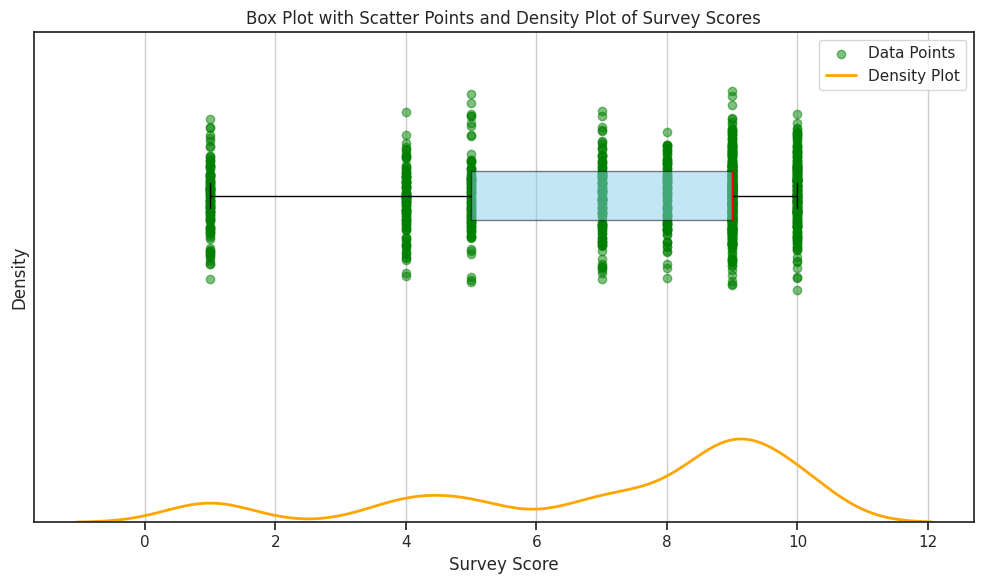

In [99]:
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the provided URL
url = "https://raw.githubusercontent.com/DSabarish/NPS-Analysis-with-NumPy/main/survey.txt"
response = requests.get(url)
data = response.text.strip().split('\n')

# Convert data to integers
data = np.array([int(score) for score in data])

# Create box plot
plt.figure(figsize=(10, 6))

# Box plot
box = plt.boxplot(data, vert=False, patch_artist=True,
                  boxprops=dict(facecolor='skyblue', color='black', alpha=0.5),
                  medianprops=dict(color='red'))

# Scatter plot with slight random noise to y-values
y = np.ones_like(data) + np.random.normal(0, 0.1, size=len(data))
plt.scatter(data, y, alpha=0.5, color='green', label='Data Points')

# Density plot
sns.kdeplot(data, color='orange', linewidth=2, label='Density Plot')

plt.title('Box Plot with Scatter Points and Density Plot of Survey Scores')
plt.xlabel('Survey Score')
plt.yticks([])
plt.legend()
plt.grid(axis='x')

# Show plot
plt.tight_layout()
plt.show()


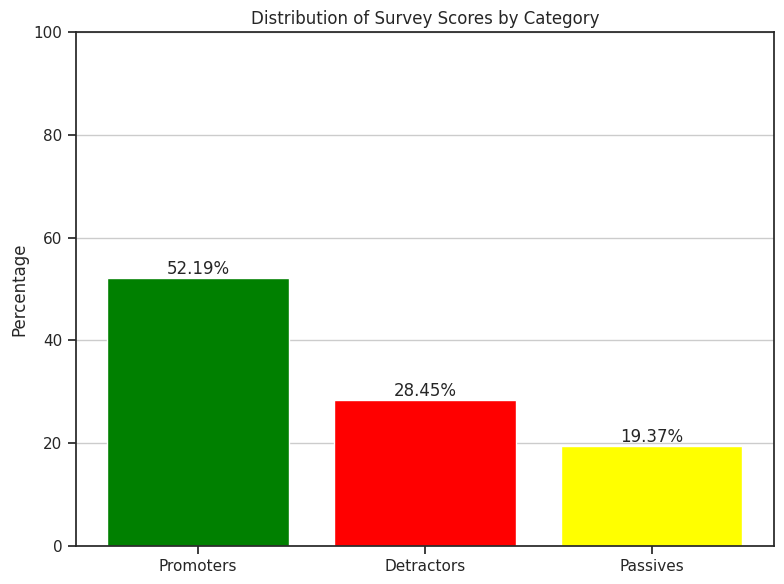

In [111]:
# Create grouped bar chart
categories = ['Promoters', 'Detractors', 'Passives']
percentages = [promoters_percentage, detractors_percentage, passives_percentage]

plt.figure(figsize=(8, 6))
bars = plt.bar(categories, percentages, color=['green', 'red', 'yellow'])

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.2f}%',
             ha='center', va='bottom')

plt.title('Distribution of Survey Scores by Category')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.grid(axis='y')

# Show plot
plt.tight_layout()
plt.show()

Number of Promoters: 20 (20.00%)
Number of Detractors: 59 (59.00%)
Number of Passives: 21 (21.00%)


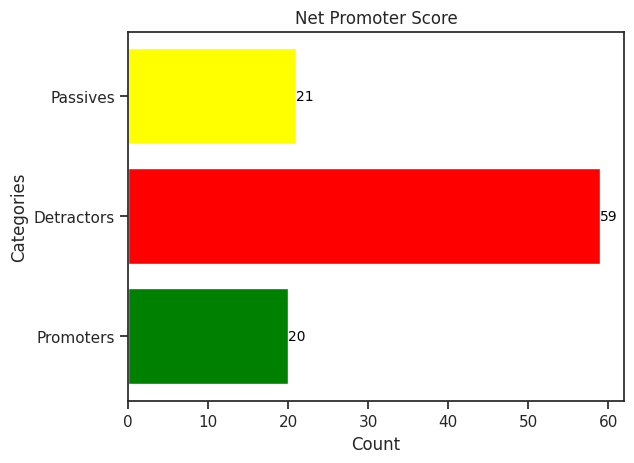

In [112]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' is your list/array of responses
# For demonstration purposes, let's create a sample 'data'
data = np.random.randint(1, 11, 100)

# responses
total_responses = len(data)

# promoters
promoters = np.sum(data >= 9)
promoters_percentage = (promoters / total_responses) * 100

# detractors
detractors = np.sum(data <= 6)
detractors_percentage = (detractors / total_responses) * 100

# passives
passives = np.sum((data >= 7) & (data <= 8))
passives_percentage = (passives / total_responses) * 100

# Display the counts and percentages
print(f"Number of Promoters: {promoters} ({promoters_percentage:.2f}%)")
print(f"Number of Detractors: {detractors} ({detractors_percentage:.2f}%)")
print(f"Number of Passives: {passives} ({passives_percentage:.2f}%)")

# Create the grouped bar chart
labels = ['Promoters', 'Detractors', 'Passives']
counts = [promoters, detractors, passives]

fig, ax = plt.subplots()
bars = ax.barh(labels, counts, color=['green', 'red', 'yellow'])

# Add counts on top of the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             f'{width}',
             ha='left', va='center',
             color='black', fontsize=10)

# Set labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Categories')
ax.set_title('Net Promoter Score')

# Show the plot
plt.show()
